___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering


#### Load Dataset

In [2]:
df = pd.read_csv('data/Mall_Customers.csv')

In [3]:

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [4]:
df.rename(columns = {'Annual Income (k$)':'Annual Income', 'Spending Score (1-100)':'Spending Score'}, inplace = True)

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [5]:
df.shape

(200, 5)

In [6]:
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.dtypes

CustomerID         int64
Gender            object
Age                int64
Annual Income      int64
Spending Score     int64
dtype: object

In [10]:
df.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
df.drop('CustomerID', axis=1, inplace= True)
df.head(1)

,Gender,Age,Annual Income,Spending Score
0,Male,19,15,39


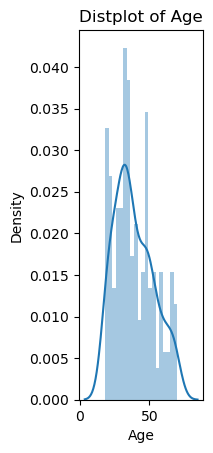

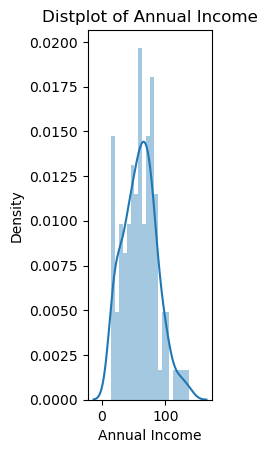

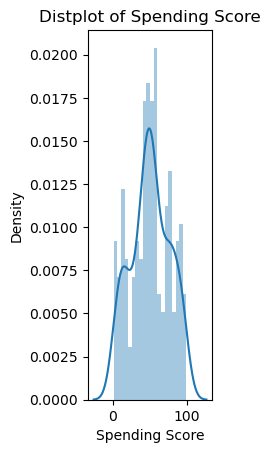

In [12]:
plt.figure()
n = 0
for x in ['Age', 'Annual Income', 'Spending Score']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace= 0.5, wspace=0.5)
    sns.distplot(df[x], bins = 20)
    plt.title('Distplot of {}'.format(x))
    plt.show()

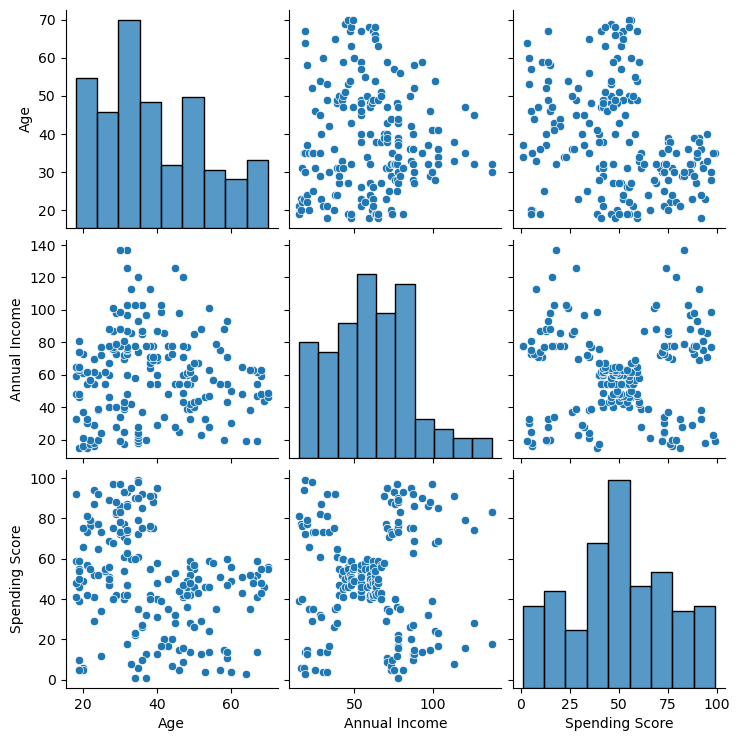

In [13]:
sns.pairplot(data= df)
plt.show()
#colums relationship 

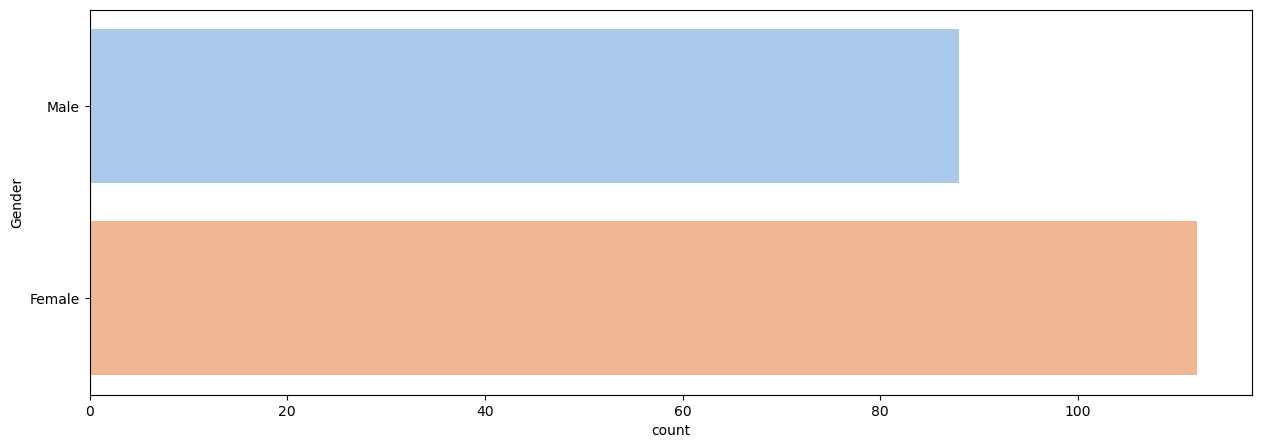

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(y = 'Gender' , data = df, palette= 'pastel')

plt.show()
#there is more females than males 

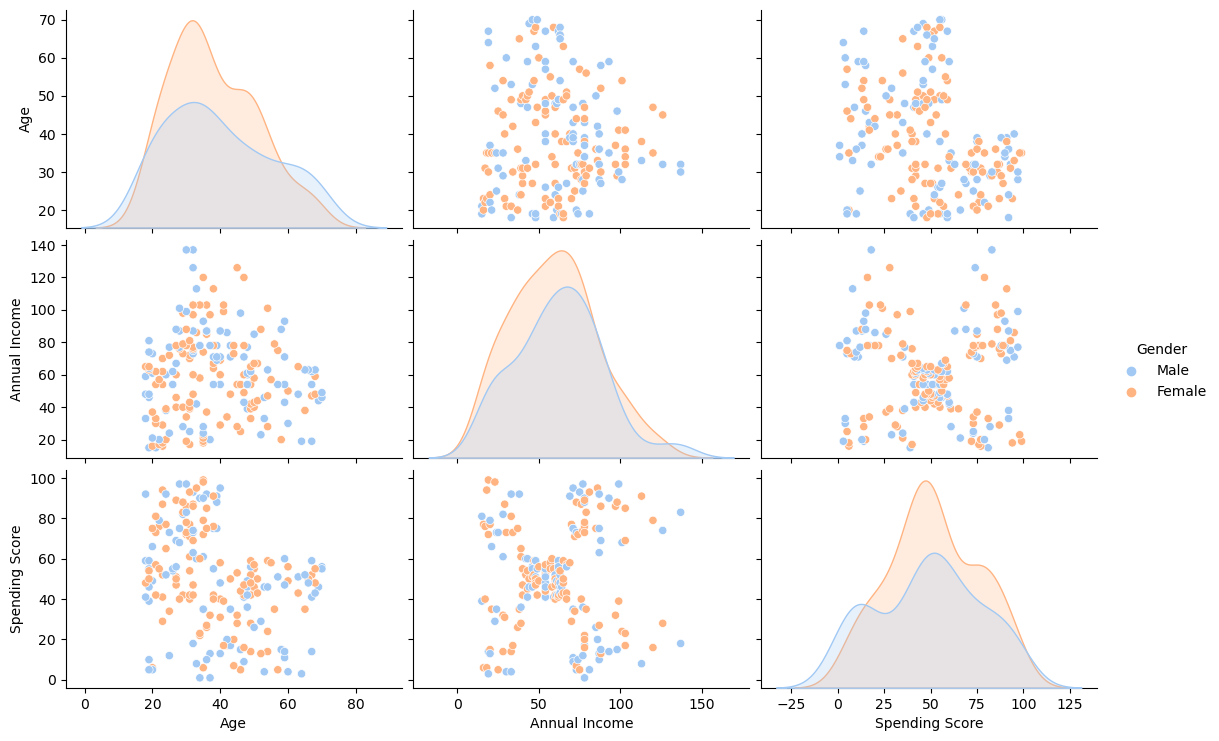

In [15]:
sns.pairplot( data= df, hue='Gender', aspect=1.5, palette= 'pastel');

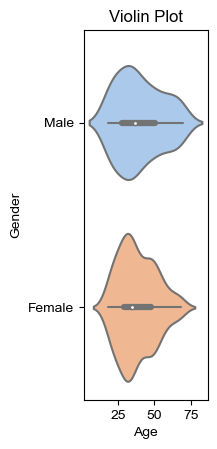

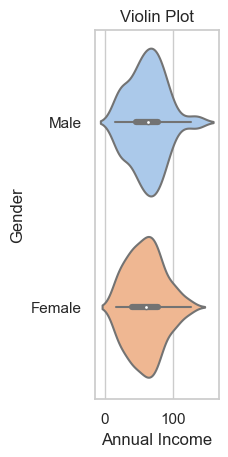

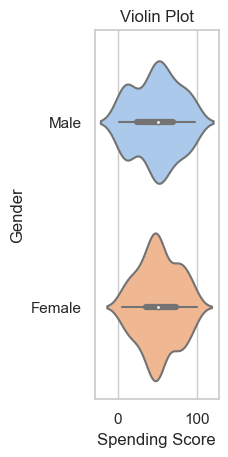

In [16]:
 plt.plot()
n = 0
for cols in ['Age', 'Annual Income', 'Spending Score']:
    n+=1
    plt.subplot(1,3,n)
    sns.set(style = 'whitegrid')
    plt.subplots_adjust(hspace= .5, wspace=.5)
    sns.violinplot(x = cols,y = 'Gender',data = df,palette= 'pastel')
    plt.title('Violin Plot')
    plt.show()

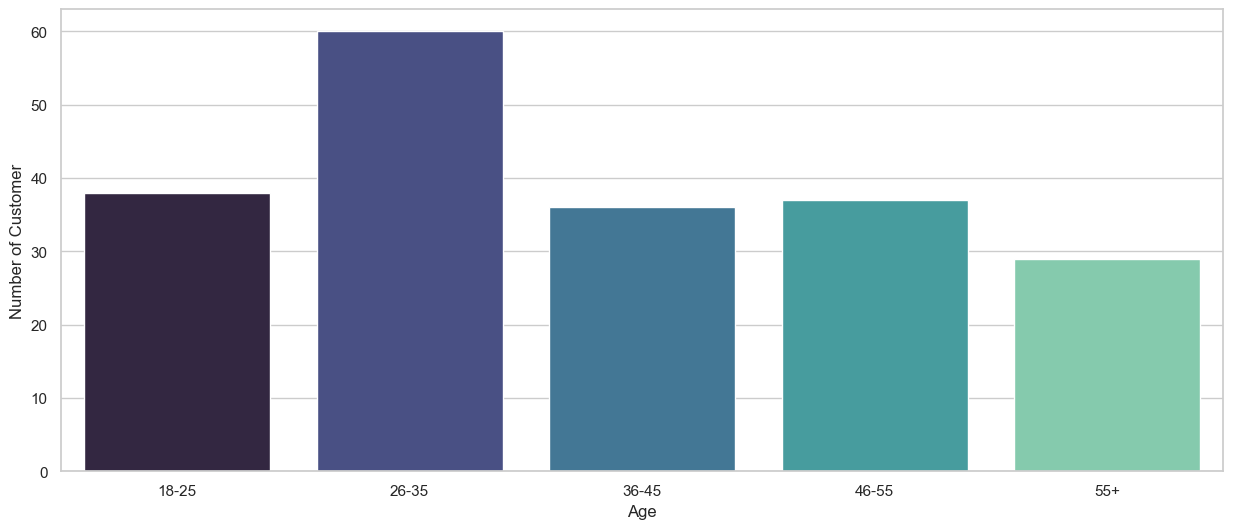

In [17]:
# Creating group of ages:
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_above_55 = df.Age[(df.Age >= 56)]
agex = ['18-25', '26-35', '36-45','46-55','55+']
agey = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_above_55.values)]
plt.figure(figsize = (15,6))
sns.barplot(x = agex, y = agey , palette='mako')
plt.xlabel('Age')
plt.ylabel('Number of Customer')
plt.show()

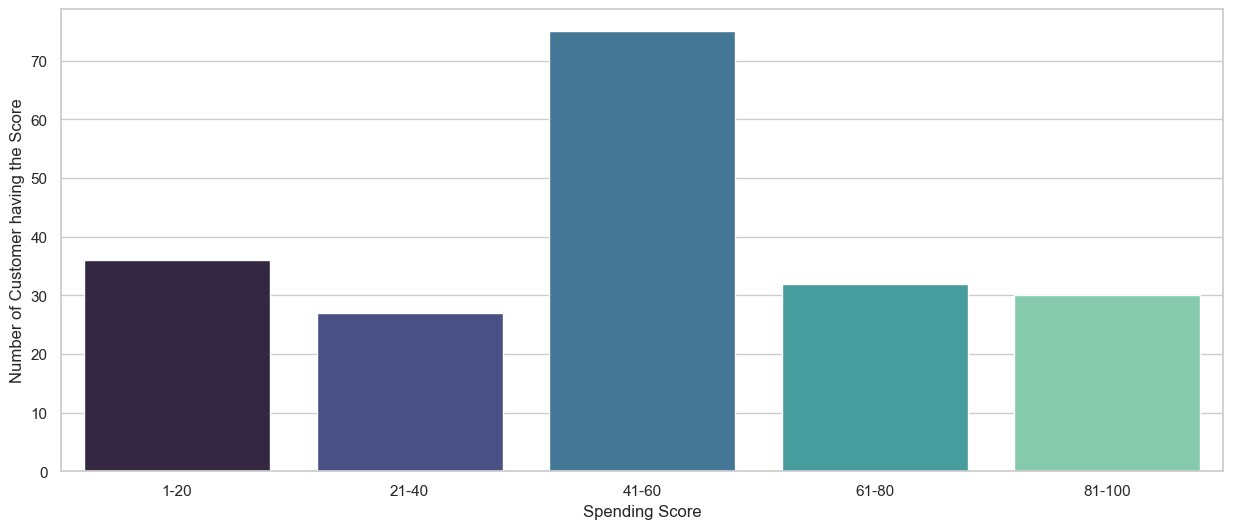

In [18]:
# Creating groups of ‘Spending Score’ column and visualizing it:
ss_1_20 = df['Spending Score'][(df['Spending Score'] >= 1) & (df['Spending Score'] <= 20)]
ss_21_40 = df['Spending Score'][(df['Spending Score'] >= 21) & (df['Spending Score'] <= 40)]
ss_41_60 = df['Spending Score'][(df['Spending Score'] >= 41) & (df['Spending Score'] <= 60)]
ss_61_80 = df['Spending Score'][(df['Spending Score'] >= 61) & (df['Spending Score'] <= 80)]
ss_81_100 = df['Spending Score'][(df['Spending Score'] >= 81) & (df['Spending Score'] <= 100)]
ssx = ['1-20','21-40','41-60','61-80','81-100']
ssy = [len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]
plt.figure(figsize=(15,6))
sns.barplot(x = ssx, y = ssy, palette='mako')
plt.xlabel('Spending Score')
plt.ylabel('Number of Customer having the Score')
plt.show()


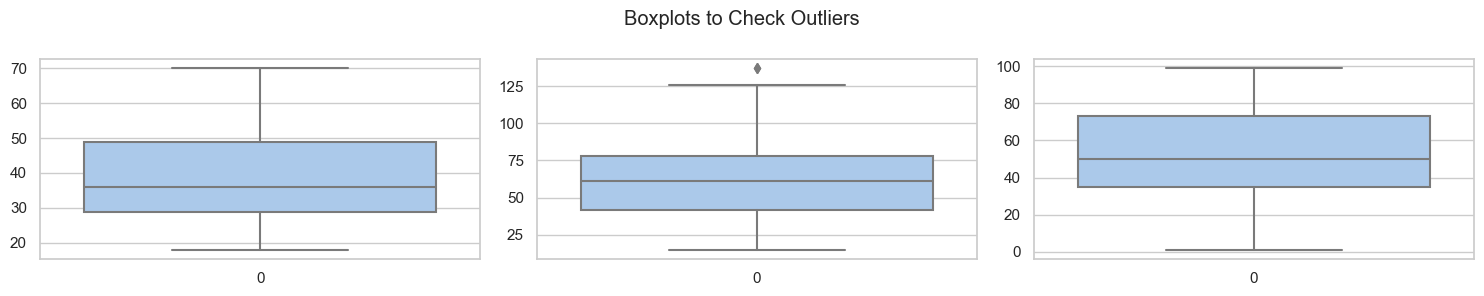

In [19]:
# Outliers check
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
cols = ['Age', 'Annual Income', 'Spending Score']
for i in range(len(cols)):
    sns.boxplot(df[cols[i]], ax=axs[i], palette= 'pastel')
fig.suptitle('Boxplots to Check Outliers')
plt.tight_layout()
plt.show()

---
---

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [20]:
df2 = df[['Age', 'Spending Score']].copy()

In [21]:
df2.head()

,Age,Spending Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


#### *ii. Determine optimal number of clusters*

## Elbow method

In [22]:

ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(df2)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

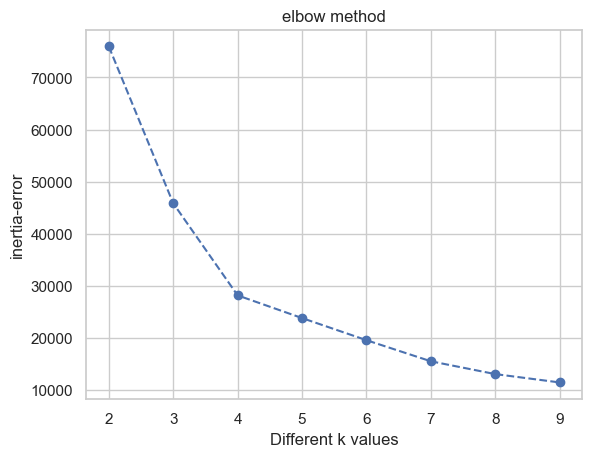

In [23]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [24]:
-pd.Series(ssd).diff()

0             NaN
1    30108.479394
2    17675.093049
3     4354.060042
4     4245.001183
5     4052.329207
6     2458.566268
7     1602.337955
dtype: float64

### 

In [25]:
K = range(2, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(df2)
    distances = kmeanModel.transform(df2)
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] 
        result.append(np.mean(cluster_distances ** 2)) 
    distortion.append(sum(result))

Text(0.5, 1.0, 'elbow method')

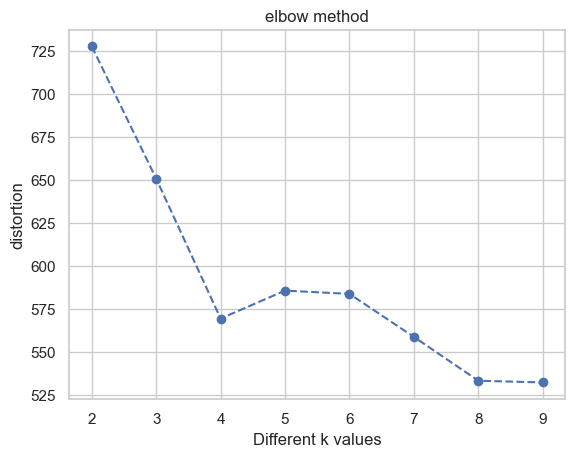

In [26]:
plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

Both elbow tests have k = 4 as the optimal k number for clustering.

### Finding Silhouette Scores for Each Cluster

In [27]:
# calculate the score for each cluster
# Set range of clusters you prefer to test on
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeans.fit(df2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.44526667994351227
For n_clusters=6, the silhouette score is 0.44845919861907363
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.4280182657184854
For n_clusters=9, the silhouette score is 0.41447652571263843


In [28]:
K_means_model_ageSpending = KMeans(n_clusters=4, random_state=42)
K_means_model_ageSpending.fit(df2)

KMeans(n_clusters=4, random_state=42)

In [29]:
# calculate the score for all clusters
silhouette_score(df2, K_means_model_ageSpending.labels_)

0.49973941540141753

#### *iv. Visualizing and Labeling All the Clusters*

In [30]:
df2= df2.values

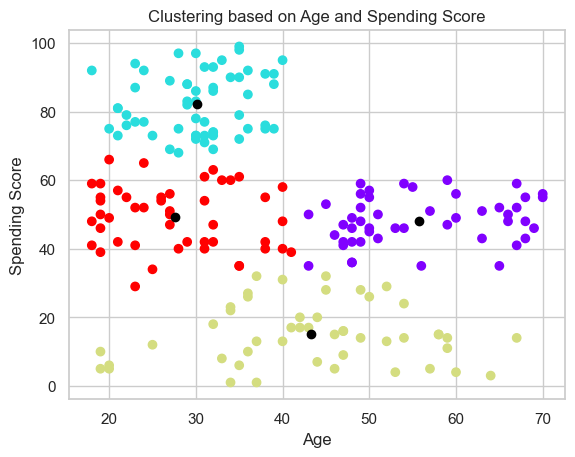

In [31]:
plt.scatter(df2[:,0],df2[:,1], c=K_means_model_ageSpending.labels_, cmap = 'rainbow')
plt.scatter(K_means_model_ageSpending.cluster_centers_[:,0], K_means_model_ageSpending.cluster_centers_[:,1], color = 'black')
plt.title('Clustering based on Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

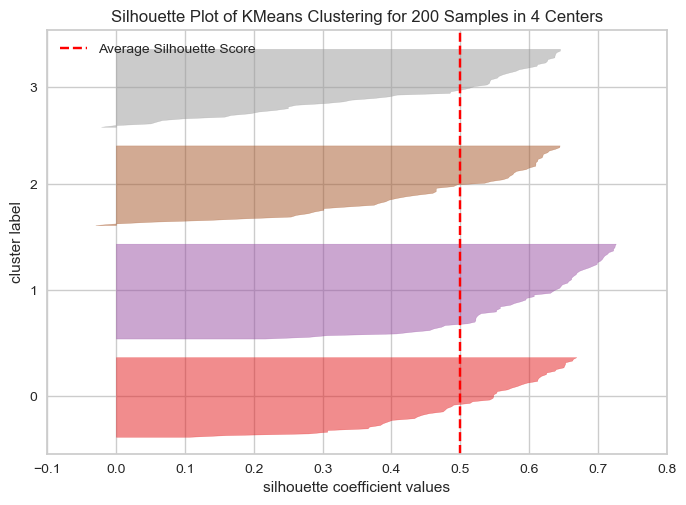

In [32]:

from yellowbrick.cluster import SilhouetteVisualizer


visualizer = SilhouetteVisualizer(K_means_model_ageSpending)

visualizer.fit(df2)    
visualizer.poof();

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [33]:
df3 = df[['Annual Income', 'Spending Score']].copy()

#### *ii. Determine optimal number of clusters*

In [34]:
K_means_model2 = KMeans(n_clusters=5, random_state=42)

#### *iii. Apply K Means*

In [35]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(df3)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

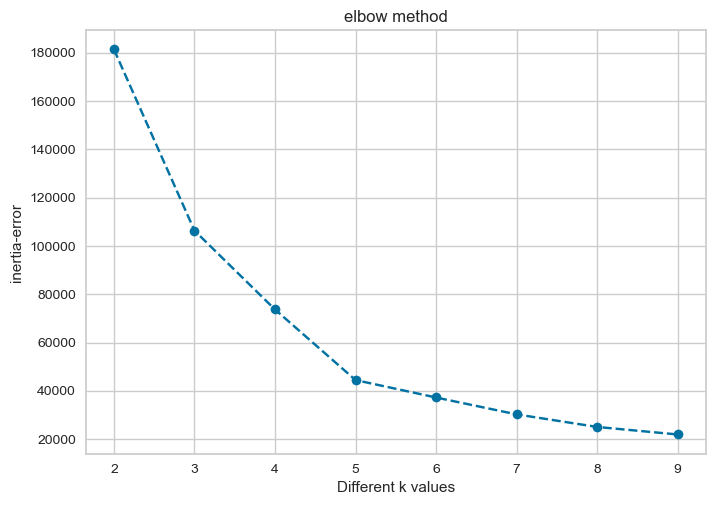

In [36]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [37]:
-pd.Series(ssd).diff()

0             NaN
1    75015.222897
2    32668.584023
3    29231.333592
4     7214.640937
5     6992.470893
6     5204.926014
7     3119.622814
dtype: float64

In [38]:
K = range(2, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(df3)
    distances = kmeanModel.transform(df3)
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] 
        result.append(np.mean(cluster_distances ** 2)) 
    distortion.append(sum(result))

Text(0.5, 1.0, 'elbow method')

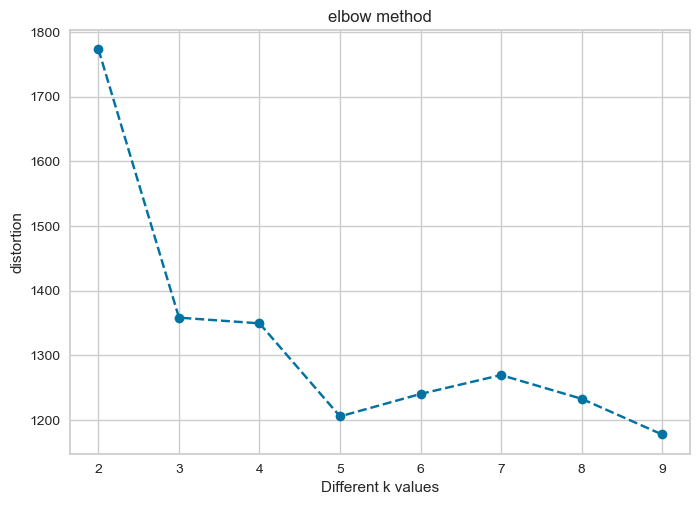

In [39]:
plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

Both elbow tests have k = 5 as the optimal k number for clustering.

In [40]:
# calculate the score for each cluster
# Set range of clusters you prefer to test on
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeans.fit(df3)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df3, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5288104473798049
For n_clusters=8, the silhouette score is 0.45481197931195283
For n_clusters=9, the silhouette score is 0.4561091950997367


In [41]:
K_means_model2.fit(df3)

KMeans(n_clusters=5, random_state=42)

#### *iv. Visualizing and Labeling All the Clusters*

In [42]:
df3 = df3.values

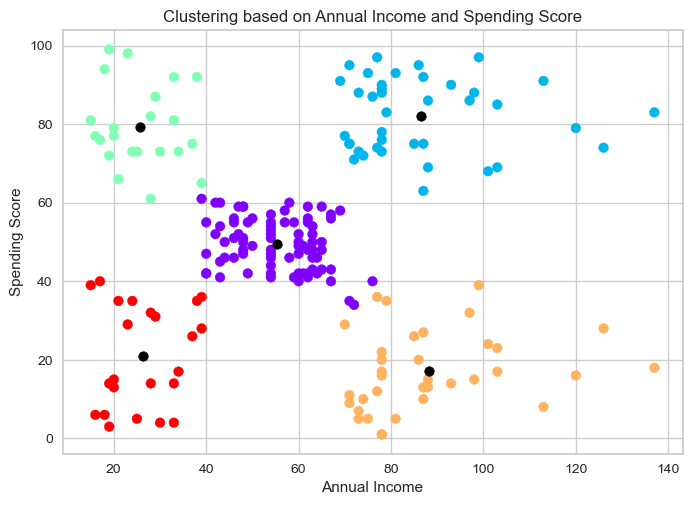

In [43]:
plt.scatter(df3[:,0],df3[:,1], c=K_means_model2.labels_, cmap = 'rainbow')
plt.scatter(K_means_model2.cluster_centers_[:,0], K_means_model2.cluster_centers_[:,1], color = 'black')
plt.title('Clustering based on Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

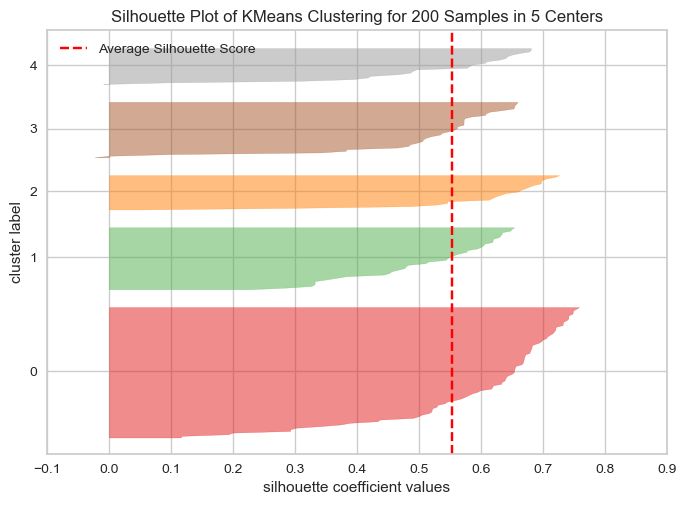

In [44]:
visualizer = SilhouetteVisualizer(K_means_model2)

visualizer.fit(df3)    
visualizer.poof();

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [45]:
df.columns

Index(['Gender', 'Age', 'Annual Income', 'Spending Score'], dtype='object')

In [46]:
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})

In [47]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
scaled

array([[0.        , 0.01923077, 0.        , 0.3877551 ],
       [0.        , 0.05769231, 0.        , 0.81632653],
       [1.        , 0.03846154, 0.00819672, 0.05102041],
       [1.        , 0.09615385, 0.00819672, 0.7755102 ],
       [1.        , 0.25      , 0.01639344, 0.39795918],
       [1.        , 0.07692308, 0.01639344, 0.76530612],
       [1.        , 0.32692308, 0.02459016, 0.05102041],
       [1.        , 0.09615385, 0.02459016, 0.94897959],
       [0.        , 0.88461538, 0.03278689, 0.02040816],
       [1.        , 0.23076923, 0.03278689, 0.7244898 ],
       [0.        , 0.94230769, 0.03278689, 0.13265306],
       [1.        , 0.32692308, 0.03278689, 1.        ],
       [1.        , 0.76923077, 0.04098361, 0.14285714],
       [1.        , 0.11538462, 0.04098361, 0.7755102 ],
       [0.        , 0.36538462, 0.04098361, 0.12244898],
       [0.        , 0.07692308, 0.04098361, 0.79591837],
       [1.        , 0.32692308, 0.04918033, 0.34693878],
       [0.        , 0.03846154,

In [48]:
hc_ward = linkage(df2, method="ward")
hc_complete = linkage(df2, "complete")
hc_average = linkage(df2, "average")
hc_single = linkage(df2, "single")



{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [45.0, 45.0, 63.75, 63.75],
  [95.0, 95.0, 105.0, 105.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [100.0, 100.0, 122.5, 122.5],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [152.5, 152.5, 182.5, 182.5],
  [111.25, 111.25, 167.5, 167.5],
  [54.375, 54.375, 139.375, 139.375],
  [20.0, 20.0, 96.875, 96.875]],
 'dcoord': [[0.0, 34.23135571790451, 34.23135571790451, 0.0],
  [0.0, 36.96759442764475, 36.96759442764475, 0.0],
  [34.23135571790451, 85.17172154067977, 85.17172154067977, 36.96759442764475],
  [0.0, 30.316059969321405, 30.316059969321405, 0.0],
  [0.0, 41.040195163371465, 41.040195163371465, 30.316059969321405],
  [0.0, 59.18553042335814, 59.18553042335814, 41.040195163371465],
  [0.0, 86.82858568

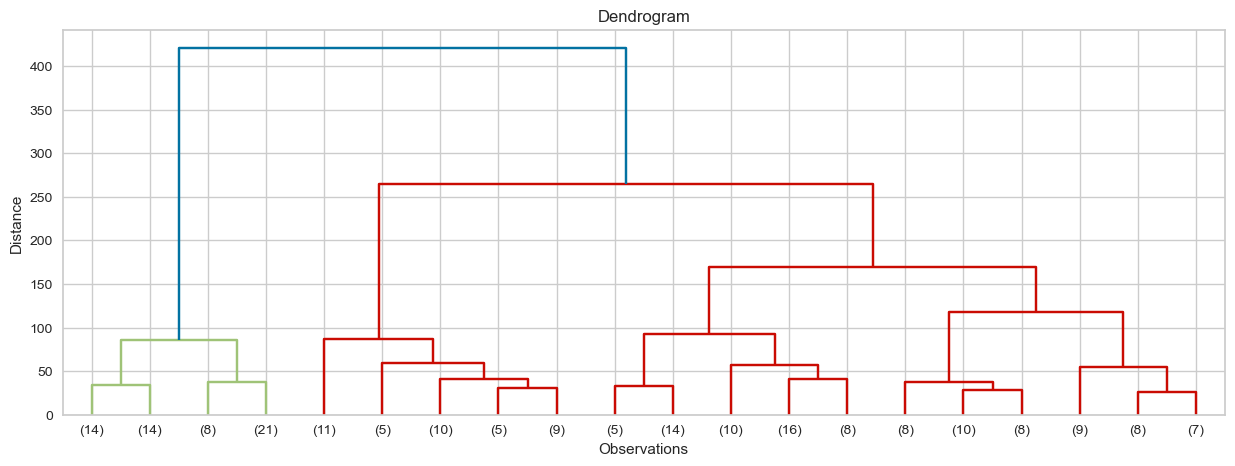

In [49]:
plt.figure(figsize = (15,5))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size=10, truncate_mode='lastp', p=20)

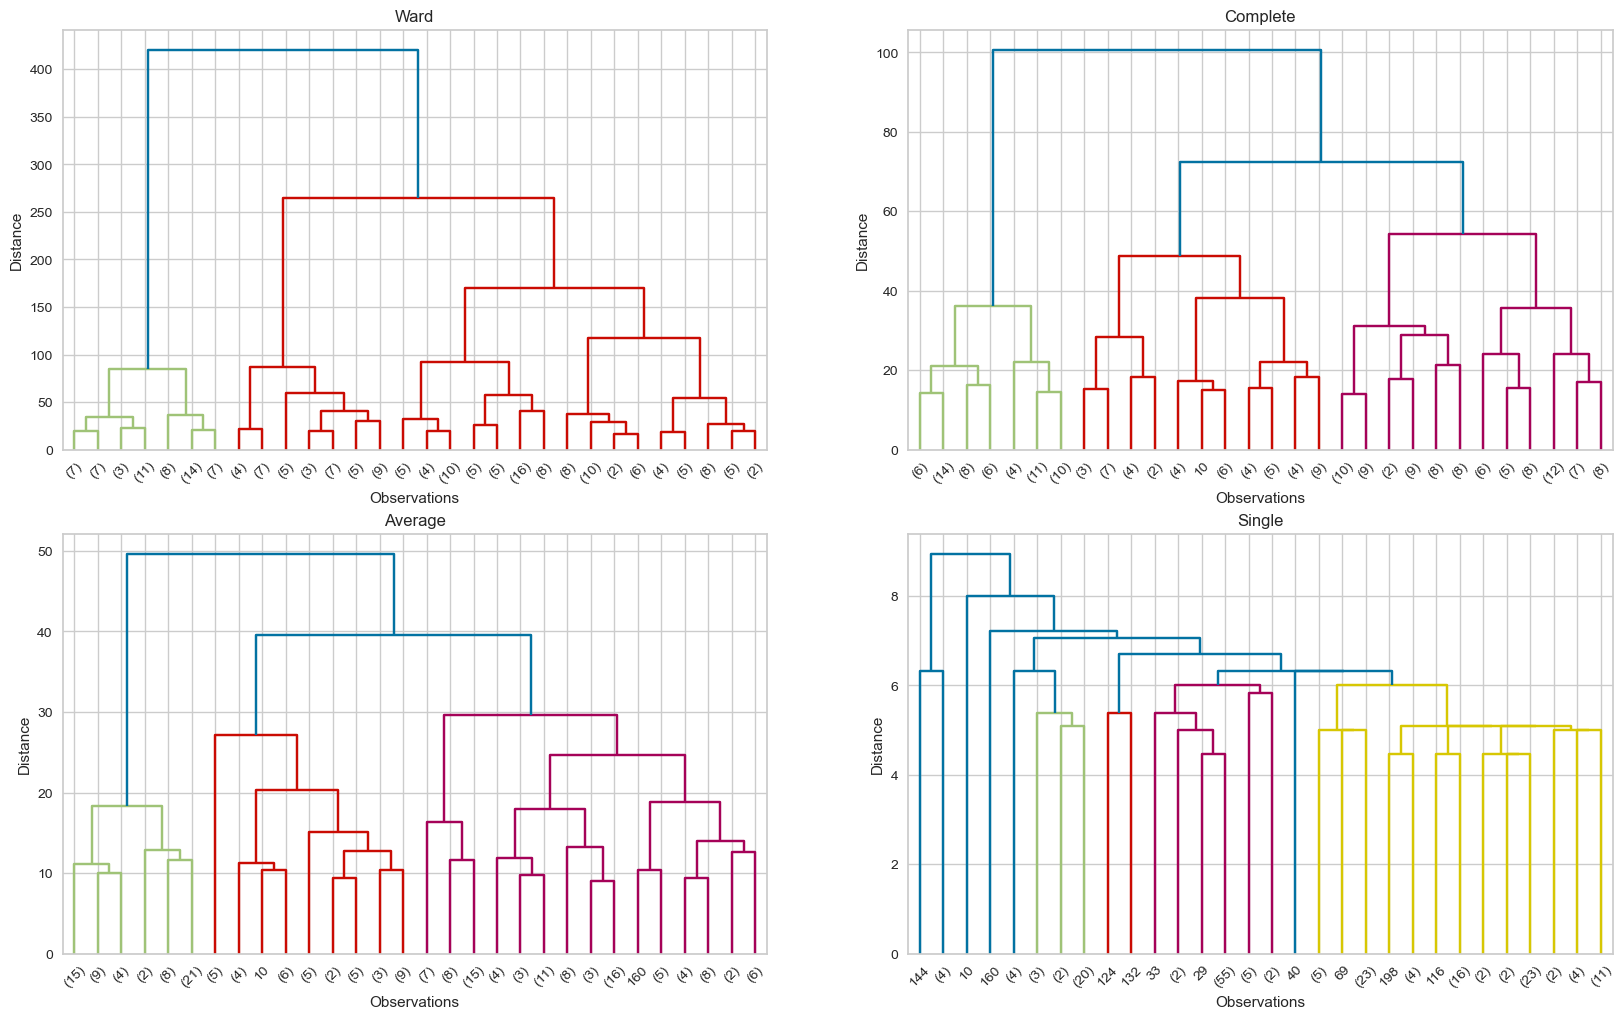

In [50]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp')

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp')

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp')

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp');

## Clustering based on Annual Income and Spending Score- x2

In [51]:
# linkage methods
hc_ward = linkage(df3, method='ward')
hc_complete = linkage(df3, 'complete')
hc_average = linkage(df3, 'average')
hc_single = linkage(df3, 'single')


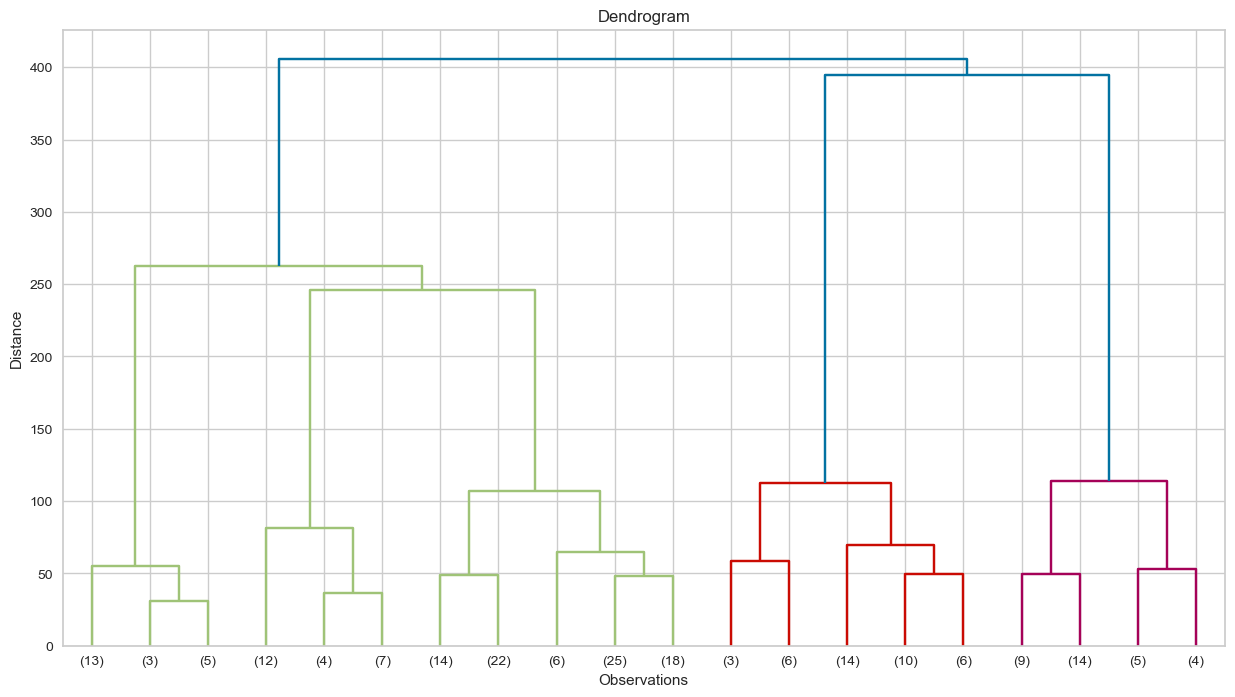

In [52]:
plt.figure(figsize = (15,8))
plt.title('Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hc_ward, leaf_font_size=10, truncate_mode='lastp', p=20);

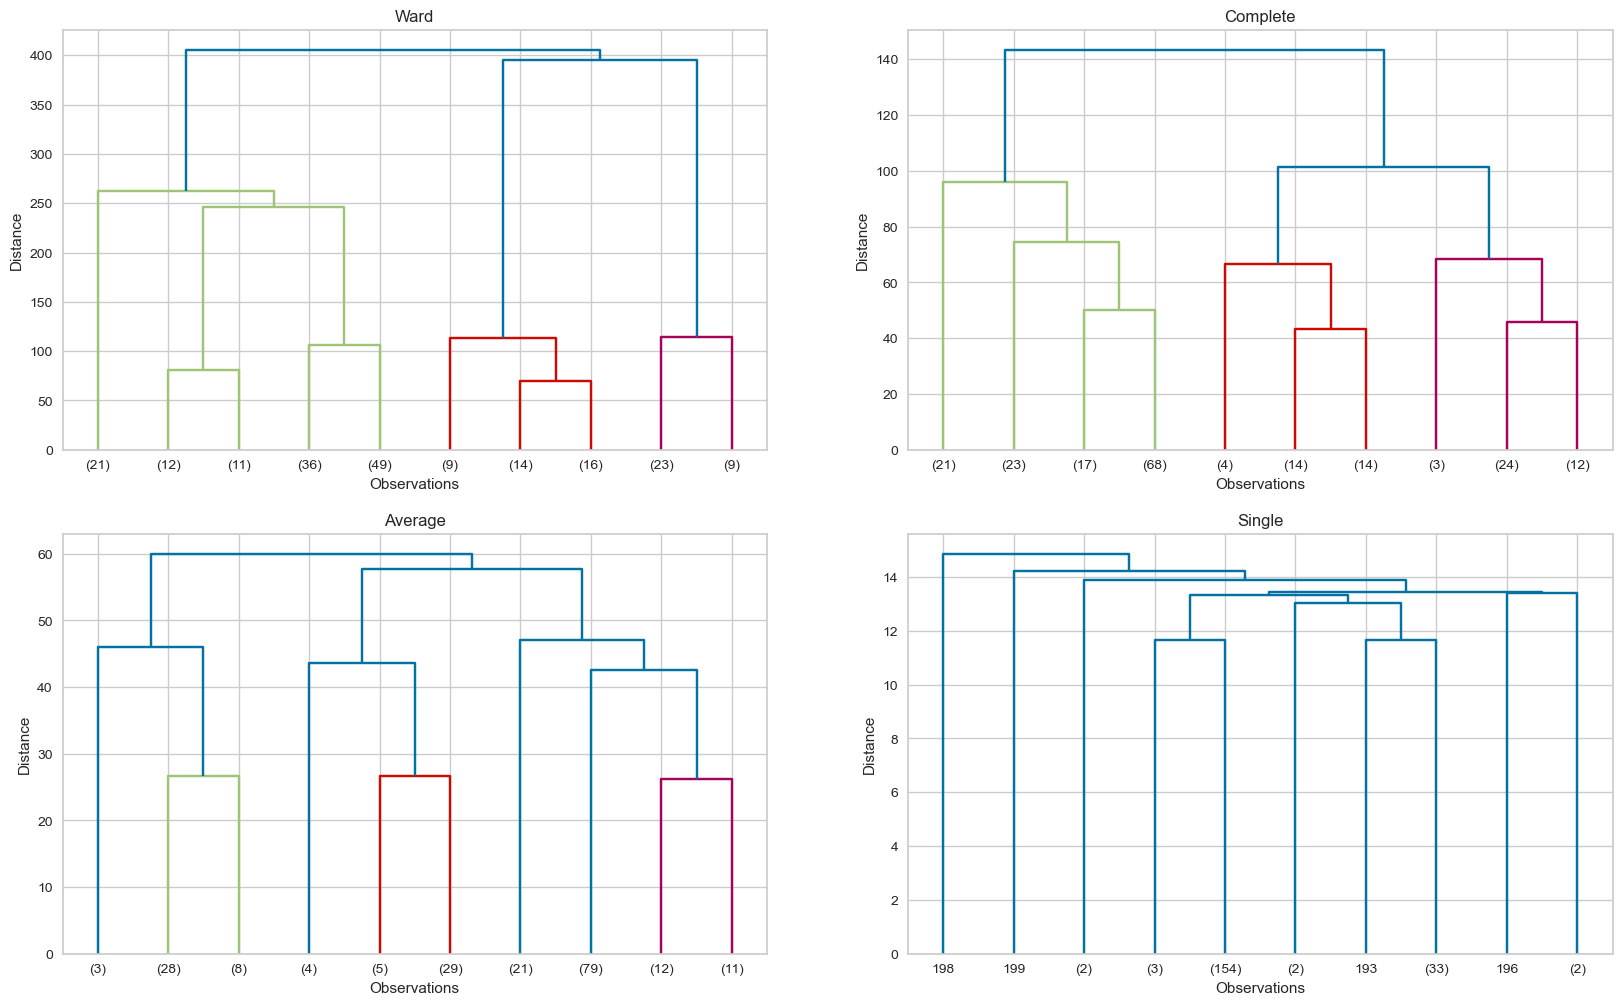

In [53]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p = 10);

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p = 10);

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p = 10);

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p = 10);

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [54]:
K = range(2,10)

for k in K:
    AgglomerativeClusteringModel = AgglomerativeClustering(n_clusters = k)
    AgglomerativeClusteringModel.fit(df2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df2, AgglomerativeClusteringModel.labels_)}')


Silhouette Score for 2 clusters: 0.4549465643222241
Silhouette Score for 3 clusters: 0.4411791686353356
Silhouette Score for 4 clusters: 0.4602496389565028
Silhouette Score for 5 clusters: 0.40374071753059787
Silhouette Score for 6 clusters: 0.4125958704145705
Silhouette Score for 7 clusters: 0.4158977524079244
Silhouette Score for 8 clusters: 0.3883688959732531
Silhouette Score for 9 clusters: 0.3948151533262091


In [55]:
AgglomerativeClusteringModel = AgglomerativeClustering(n_clusters=4,
                                metric="euclidean", 
                                linkage="ward")

In [56]:
AgglomerativeClusteringModel.fit(df2)

AgglomerativeClustering(metric='euclidean', n_clusters=4)

In [57]:
AgglomerativeClusteringModel.labels_

array([0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 0, 0, 3, 0, 3,
       2, 3, 2, 3, 0, 1, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 3, 0, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3,
       2, 3])

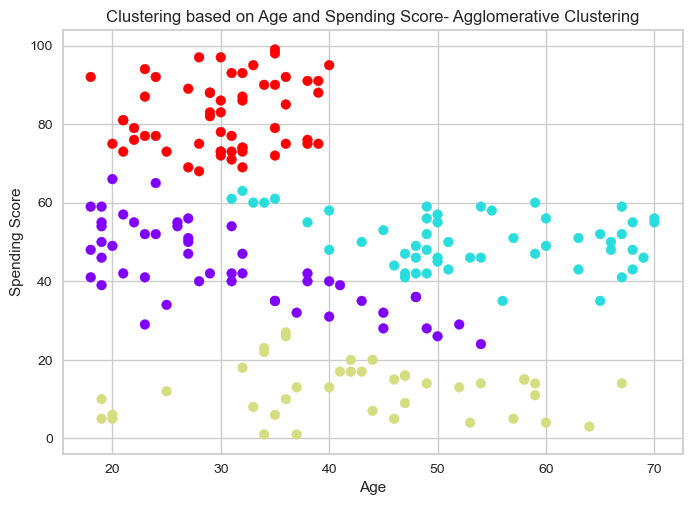

In [65]:
plt.scatter(df2[:,0],df2[:,1], c=AgglomerativeClusteringModel.labels_, cmap = 'rainbow')
plt.title('Clustering based on Age and Spending Score- Agglomerative Clustering')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

#### Annual Income and Spending Score- x2

In [59]:
K = range(2,10)

for k in K:
    AgglomerativeClusteringModel2 = AgglomerativeClustering(n_clusters = k)
    AgglomerativeClusteringModel2.fit(df3)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df3, AgglomerativeClusteringModel2.labels_)}')


Silhouette Score for 2 clusters: 0.36706444723912895
Silhouette Score for 3 clusters: 0.4618340266628975
Silhouette Score for 4 clusters: 0.4916598193892782
Silhouette Score for 5 clusters: 0.5529945955148897
Silhouette Score for 6 clusters: 0.5380208285578872
Silhouette Score for 7 clusters: 0.519904611908887
Silhouette Score for 8 clusters: 0.4326286245782246
Silhouette Score for 9 clusters: 0.43892545672004507


In [60]:
AgglomerativeClusteringModel2 = AgglomerativeClustering(n_clusters=5,
                                 metric="euclidean", 
                                 linkage="ward")
AgglomerativeClusteringModel2.fit(df3)

AgglomerativeClustering(metric='euclidean', n_clusters=5)

In [61]:
AgglomerativeClusteringModel2.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

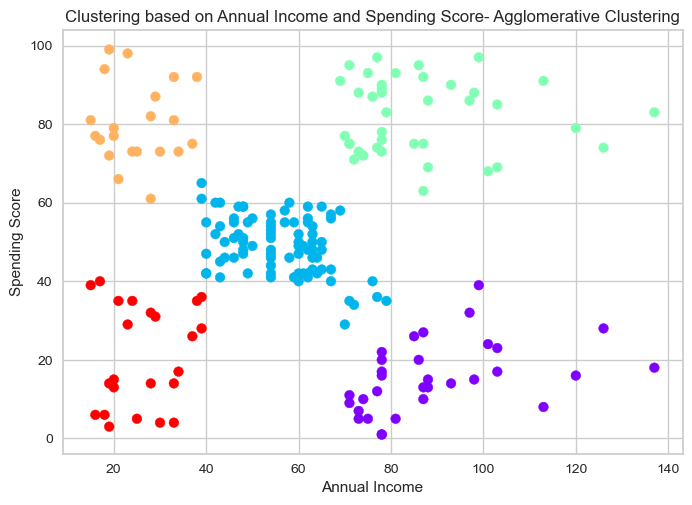

In [66]:
plt.scatter(df3[:,0],df3[:,1], c=AgglomerativeClusteringModel2.labels_, cmap = 'rainbow')
plt.title('Clustering based on Annual Income and Spending Score- Agglomerative Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

#### Interpretation based on Age and Spending Score- x1

Text(0.5, 1.0, 'Agglomerative clustering (Age and Spending Score)')

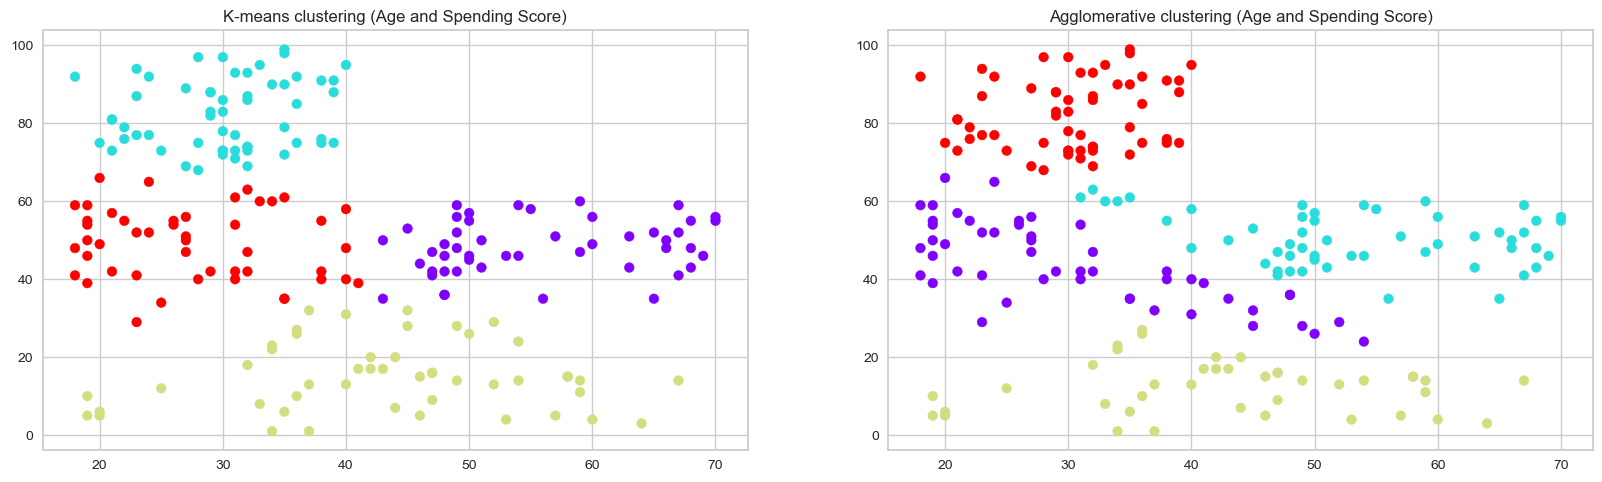

In [73]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.scatter(df2[:,0],df2[:,1], c=K_means_model_ageSpending.labels_, cmap = 'rainbow')
plt.title('K-means clustering (Age and Spending Score)')


plt.subplot(222)
plt.scatter(df2[:,0],df2[:,1], c=AgglomerativeClusteringModel.labels_, cmap = 'rainbow')
plt.title('Agglomerative clustering (Age and Spending Score)')


### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

Text(0.5, 1.0, 'Agglomerative clustering (Annual Income and Spending Score)')

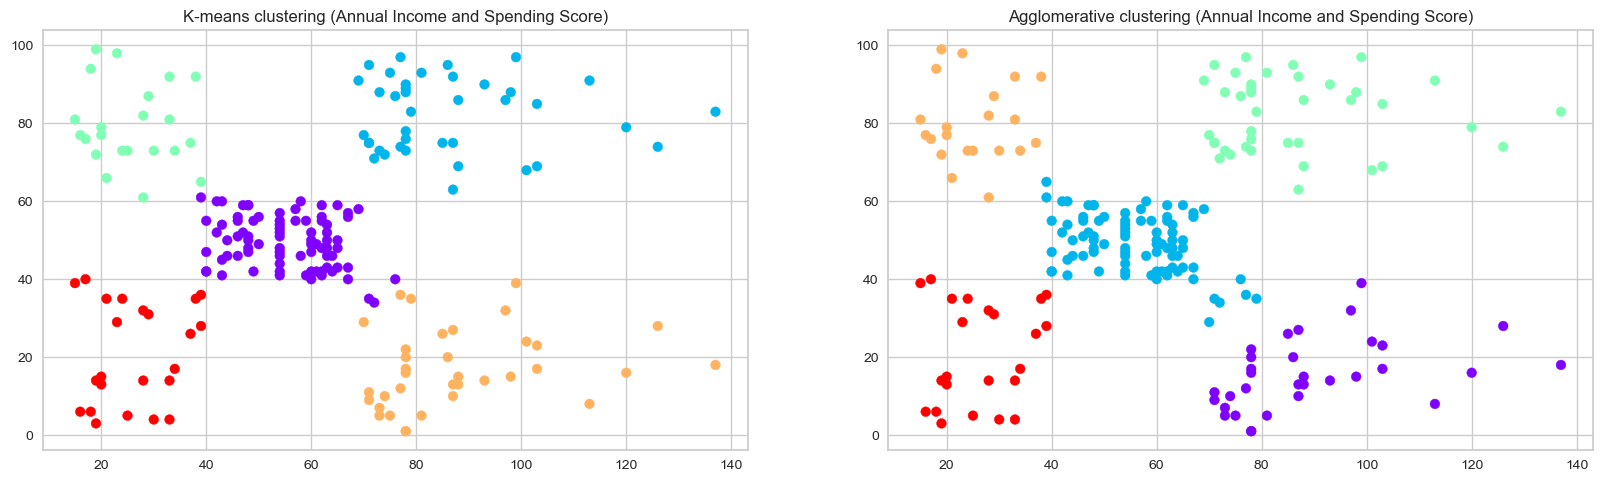

In [74]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.scatter(df3[:,0],df3[:,1], c=K_means_model2.labels_, cmap = 'rainbow')
plt.title('K-means clustering (Annual Income and Spending Score)')


plt.subplot(222)
plt.scatter(df3[:,0],df3[:,1], c=AgglomerativeClusteringModel2.labels_, cmap = 'rainbow')
plt.title('Agglomerative clustering (Annual Income and Spending Score)')


## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4a84edac-0c18-40c0-b96e-7bf5338c7645' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>